# 지하철 이용객 분석

- https://data.busan.go.kr/
- 승하차 인원정보 겸색
- 일별 역별 시간대별 승하차 파일 받기
- 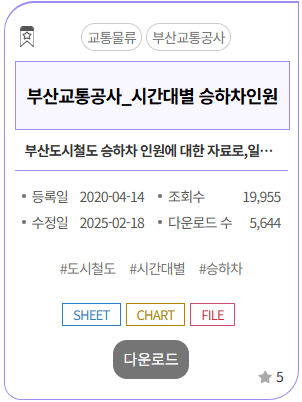

In [40]:
import pandas as pd

file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"

data = pd.read_csv(file_path, encoding="EUC-KR")

data.head() # 맨 앞 데이터 5개 가져오기
# data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,42,49,2203,1558,466,296,283,309,337,365,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,89,1826,2338,116,109,205,282,297,356,388,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,78,144,372,387,277,388,328,337,377,358,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,23,102,143,169,160,177,249,301,363,301,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,68,145,343,408,303,304,332,276,334,338,401,300,363,237,139,102,70,69,13,0


In [41]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f"{i}~{i+1}H" for i in range(1, 24)]

columns = columns + time_col + ['24~1H']

data.columns = columns

# data.iloc[:,:6]
df = data.loc[:,:'total']

df

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572
...,...,...,...,...,...,...
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898


In [42]:
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [43]:
df.tail()

,num,name,date,week,type,total
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898
6943,414,안평,2025-01-31,금,하차,1773


In [51]:
gd = df.groupby(['num', 'name', 'date', 'week']).sum().reset_index()


In [56]:
gdata = gd[['name', 'date', 'total']]

gdata = gdata.sort_values(by=['name', 'date'], ascending=[True, True])

gdata

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
...,...,...,...
2320,화명,2025-01-27,15124
2321,화명,2025-01-28,10076
2322,화명,2025-01-29,6845
2323,화명,2025-01-30,10271


In [61]:
mdata = gdata.groupby(by="name").sum().reset_index()
# mdata.drop('date', axis=1)
tdata = mdata[['name', 'total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [64]:
sdata = tdata.sort_values(by='total', ascending=False)

sdata.head(20)

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [66]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"

fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"


In [71]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [73]:
!pip install squarify

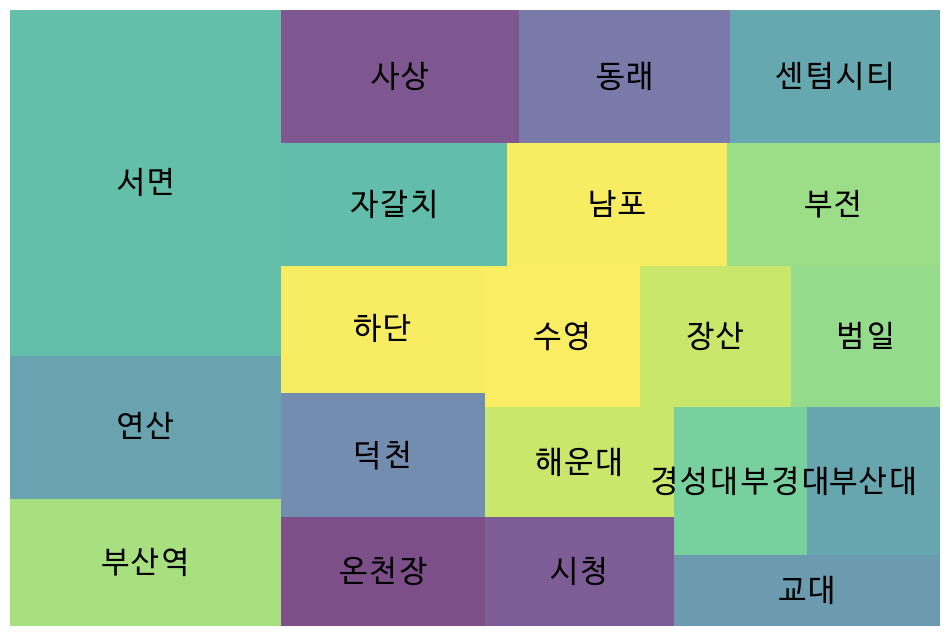

In [99]:
import squarify

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 22
plt.rcParams['text.color'] = "black"
# squarify.plot(sizes=sdata['total'], label=sdata.name, alpha=0.7)
squarify.plot(sizes=sdata['total'].iloc[:20], label=sdata['name'].iloc[:20], alpha=0.7)

plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()